In [90]:
# Importing Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [91]:
# Load the data
df = pd.read_csv("../data/raw/HepatitisCdata.csv")

In [92]:
# Display first few rows
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [93]:
# Dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (615, 14)


In [94]:
# Data types and non-null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [95]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [96]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [97]:
# Only show value counts for columns with type "object" or low unique counts
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 15:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())



Value counts for Category:
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

Value counts for Sex:
Sex
m    377
f    238
Name: count, dtype: int64


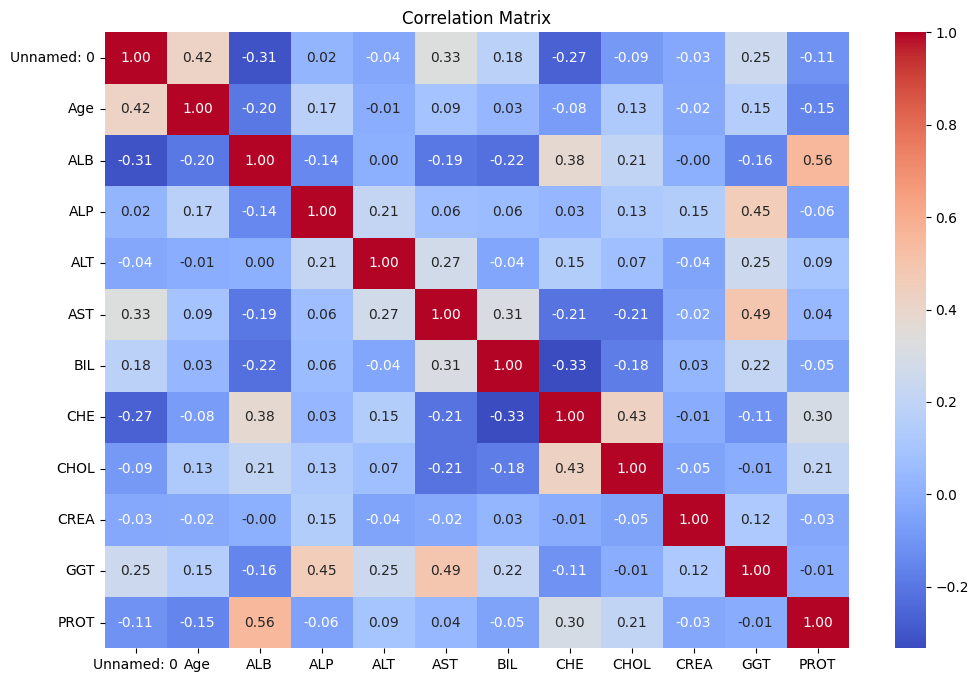

In [98]:
# Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Data Cleaning

In [99]:
# Drop Irrelevant Columns If Any
# 'Unnamed: 0' is just an index column from CSV export
df.drop(columns=['Unnamed: 0'], inplace=True)

In [100]:
# Handle Missing Values
# Numerical columns with few missing values
num_cols = ['ALB', 'ALT', 'PROT', 'CHOL', 'ALP']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_119553/2822393907.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_119553/2822393907.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [101]:
# Clean and Normalize 'Category'
# Replace values like '0=Blood Donor' and '0s=suspect Blood Donor' with consistent labels
df['Category'] = df['Category'].replace({
    '0=Blood Donor': 'Blood Donor',
    '0s=suspect Blood Donor': 'Suspect Blood Donor',
    '1=Hepatitis': 'Hepatitis',
    '2=Fibrosis': 'Fibrosis',
    '3=Cirrhosis': 'Cirrhosis'
})

In [102]:

# Encode Categorical Variables
# Sex: m/f -> 1/0
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

## Category: Label Encoding for model compatibility
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])


In [103]:
# Final Check
print("\nCleaned Data Info:\n")
print(df.info())


Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          615 non-null    object 
 1   Age               615 non-null    int64  
 2   Sex               615 non-null    int64  
 3   ALB               615 non-null    float64
 4   ALP               615 non-null    float64
 5   ALT               615 non-null    float64
 6   AST               615 non-null    float64
 7   BIL               615 non-null    float64
 8   CHE               615 non-null    float64
 9   CHOL              615 non-null    float64
 10  CREA              615 non-null    float64
 11  GGT               615 non-null    float64
 12  PROT              615 non-null    float64
 13  Category_encoded  615 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 67.4+ KB
None


In [104]:
print("\nUnique categories:", df['Category'].unique())
print("\nCleaned Dataset Shape:", df.shape)


Unique categories: ['Blood Donor' 'Suspect Blood Donor' 'Hepatitis' 'Fibrosis' 'Cirrhosis']

Cleaned Dataset Shape: (615, 14)


In [105]:
output_path = "../data/processed/cleaned_hep_c_data.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: ../data/processed/cleaned_hep_c_data.csv


# Spliting Data

In [106]:
# Load the cleaned dataset
df = pd.read_csv("../data/processed/cleaned_hep_c_data.csv")

# Preview the dataset
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encoded
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [107]:
# Encode target if categorical
from sklearn.preprocessing import LabelEncoder
target_col = 'Category'
if df[target_col].dtype == 'object':
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])
else:
    le = None

X = df.drop(target_col, axis=1)
y = df[target_col]

In [108]:
# Train-test split with stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model Training

In [109]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [110]:

def run_model(
    model, 
    X_train, y_train, X_test, y_test, 
    label_encoder=None, 
    average_method='weighted',
    plot_cm=True
):
    """ Train, evaluate, and plot confusion matrix for a single model """
    
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name} ...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    try:
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    except Exception:
        roc_auc = np.nan
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average_method, zero_division=0)
    recall = recall_score(y_test, y_pred, average=average_method, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=average_method, zero_division=0)
    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_ if label_encoder else None, zero_division=0))
    
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_ if label_encoder else None)
        disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
        plt.title(f"{model_name} Confusion Matrix")
        plt.tight_layout()
        plt.show()
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }
    
    return results



In [111]:

def plot_comparison(results_df):
    """Plot a bar chart comparison of models for each metric"""
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
    
    # Plot settings
    plt.figure(figsize=(12, 7))
    
    for metric in metrics:
        plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)
    
    plt.title("Comparison of Model Performance Metrics")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.ylim(0, 1.05)
    plt.grid(axis='y')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [112]:
models = [
        LogisticRegression(max_iter=1000, random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier(random_state=42),
        SVC(probability=True, random_state=42),
        GaussianNB(),
        RandomForestClassifier(random_state=42),
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    ]

In [113]:
# results = []
# for model in models:
#     res = run_model(model, X_train, y_train, X_test, y_test, label_encoder=le)
#     results.append(res)



Training LogisticRegression ...


/home/bs01233/Downloads/Hep-C-Paper/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for LogisticRegression:

                     precision    recall  f1-score   support

        Blood Donor       0.99      1.00      1.00       107
          Cirrhosis       0.62      0.83      0.71         6
           Fibrosis       0.75      0.75      0.75         4
          Hepatitis       1.00      0.40      0.57         5
Suspect Blood Donor       1.00      1.00      1.00         1

           accuracy                           0.96       123
          macro avg       0.87      0.80      0.81       123
       weighted avg       0.97      0.96      0.96       123



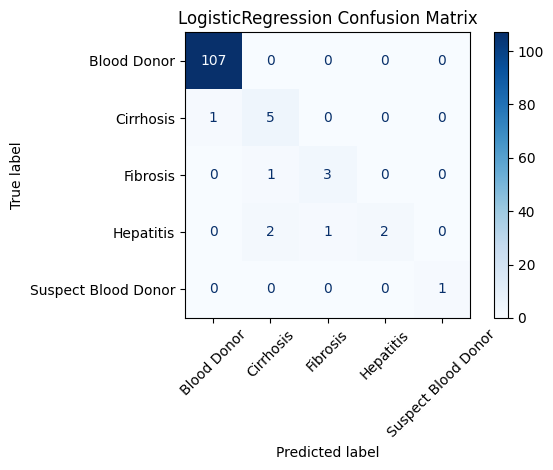

In [114]:
results = []
# Running LogisticRegression
res = run_model(models[0], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training KNeighborsClassifier ...

Classification Report for KNeighborsClassifier:

                     precision    recall  f1-score   support

        Blood Donor       0.96      1.00      0.98       107
          Cirrhosis       0.67      0.67      0.67         6
           Fibrosis       0.33      0.25      0.29         4
          Hepatitis       0.00      0.00      0.00         5
Suspect Blood Donor       0.00      0.00      0.00         1

           accuracy                           0.91       123
          macro avg       0.39      0.38      0.39       123
       weighted avg       0.87      0.91      0.89       123



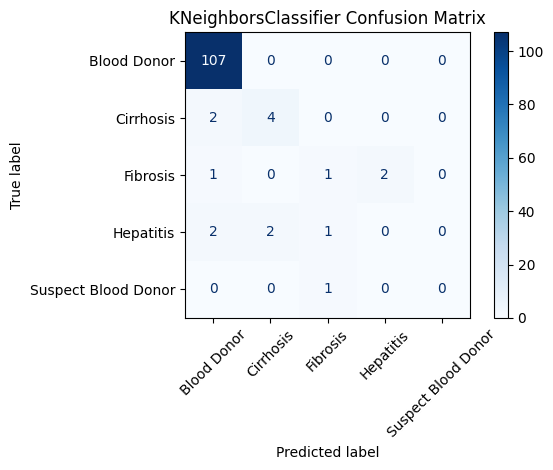

In [115]:
res = run_model(models[1], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training DecisionTreeClassifier ...

Classification Report for DecisionTreeClassifier:

                     precision    recall  f1-score   support

        Blood Donor       1.00      1.00      1.00       107
          Cirrhosis       1.00      1.00      1.00         6
           Fibrosis       1.00      1.00      1.00         4
          Hepatitis       1.00      1.00      1.00         5
Suspect Blood Donor       1.00      1.00      1.00         1

           accuracy                           1.00       123
          macro avg       1.00      1.00      1.00       123
       weighted avg       1.00      1.00      1.00       123



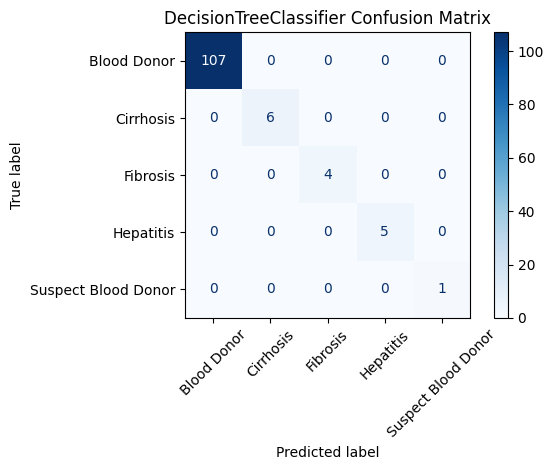

In [116]:
res = run_model(models[2], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training SVC ...

Classification Report for SVC:

                     precision    recall  f1-score   support

        Blood Donor       0.96      1.00      0.98       107
          Cirrhosis       0.62      0.83      0.71         6
           Fibrosis       0.50      0.25      0.33         4
          Hepatitis       0.00      0.00      0.00         5
Suspect Blood Donor       0.00      0.00      0.00         1

           accuracy                           0.92       123
          macro avg       0.42      0.42      0.41       123
       weighted avg       0.89      0.92      0.90       123



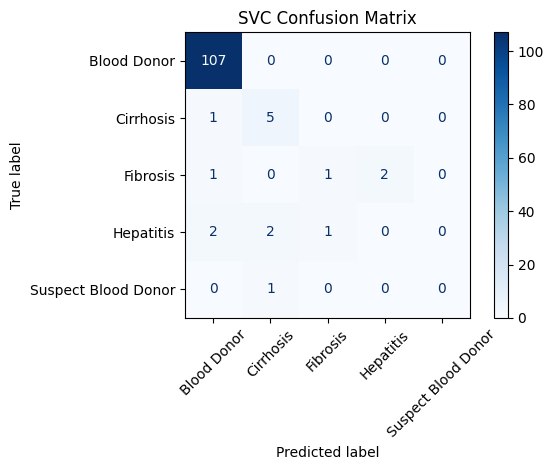

In [117]:
res = run_model(models[3], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training GaussianNB ...

Classification Report for GaussianNB:

                     precision    recall  f1-score   support

        Blood Donor       1.00      1.00      1.00       107
          Cirrhosis       1.00      1.00      1.00         6
           Fibrosis       1.00      1.00      1.00         4
          Hepatitis       1.00      1.00      1.00         5
Suspect Blood Donor       1.00      1.00      1.00         1

           accuracy                           1.00       123
          macro avg       1.00      1.00      1.00       123
       weighted avg       1.00      1.00      1.00       123



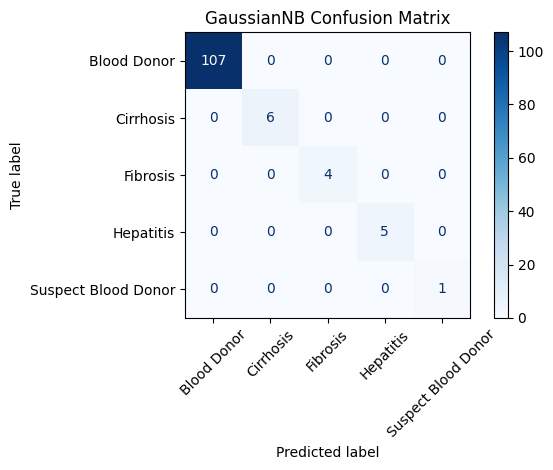

In [118]:
res = run_model(models[4], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training RandomForestClassifier ...

Classification Report for RandomForestClassifier:

                     precision    recall  f1-score   support

        Blood Donor       1.00      1.00      1.00       107
          Cirrhosis       0.86      1.00      0.92         6
           Fibrosis       1.00      1.00      1.00         4
          Hepatitis       1.00      0.80      0.89         5
Suspect Blood Donor       1.00      1.00      1.00         1

           accuracy                           0.99       123
          macro avg       0.97      0.96      0.96       123
       weighted avg       0.99      0.99      0.99       123



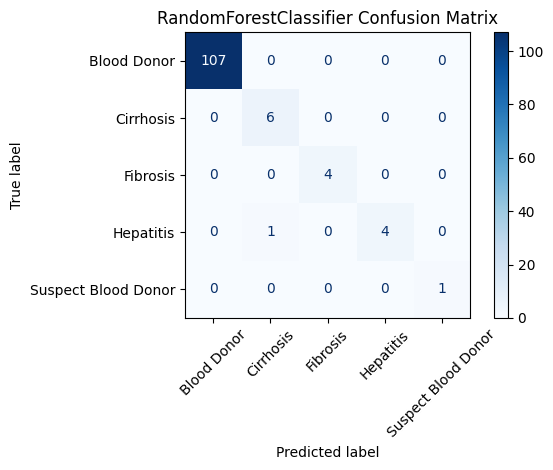

In [119]:
res = run_model(models[5], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)


Training XGBClassifier ...


/home/bs01233/Downloads/Hep-C-Paper/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:30:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBClassifier:

                     precision    recall  f1-score   support

        Blood Donor       1.00      1.00      1.00       107
          Cirrhosis       1.00      1.00      1.00         6
           Fibrosis       1.00      1.00      1.00         4
          Hepatitis       1.00      1.00      1.00         5
Suspect Blood Donor       1.00      1.00      1.00         1

           accuracy                           1.00       123
          macro avg       1.00      1.00      1.00       123
       weighted avg       1.00      1.00      1.00       123



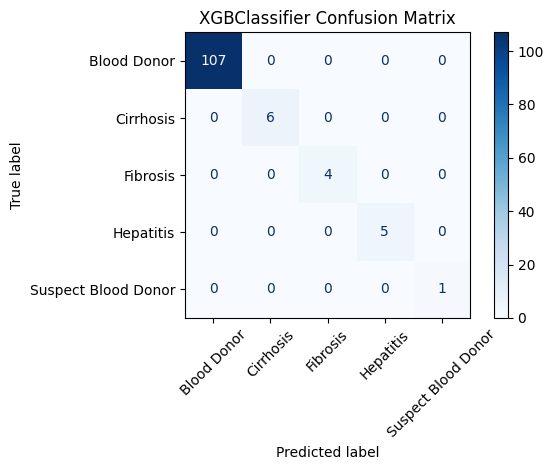

In [120]:
res = run_model(models[6], X_train, y_train, X_test, y_test, label_encoder=le)
results.append(res)

In [121]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\n\n=== Summary of all models ===\n")
print(results_df.to_string(index=False))



=== Summary of all models ===

                 Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC
DecisionTreeClassifier  1.000000   1.000000 1.000000  1.000000 1.000000
         XGBClassifier  1.000000   1.000000 1.000000  1.000000 1.000000
            GaussianNB  1.000000   1.000000 1.000000  1.000000 1.000000
RandomForestClassifier  0.991870   0.993031 0.991870  0.991731 1.000000
    LogisticRegression  0.959350   0.965522 0.959350  0.956465 0.950698
                   SVC  0.918699   0.885318 0.918699  0.899640 0.966344
  KNeighborsClassifier  0.910569   0.874443 0.910569  0.891869 0.826830


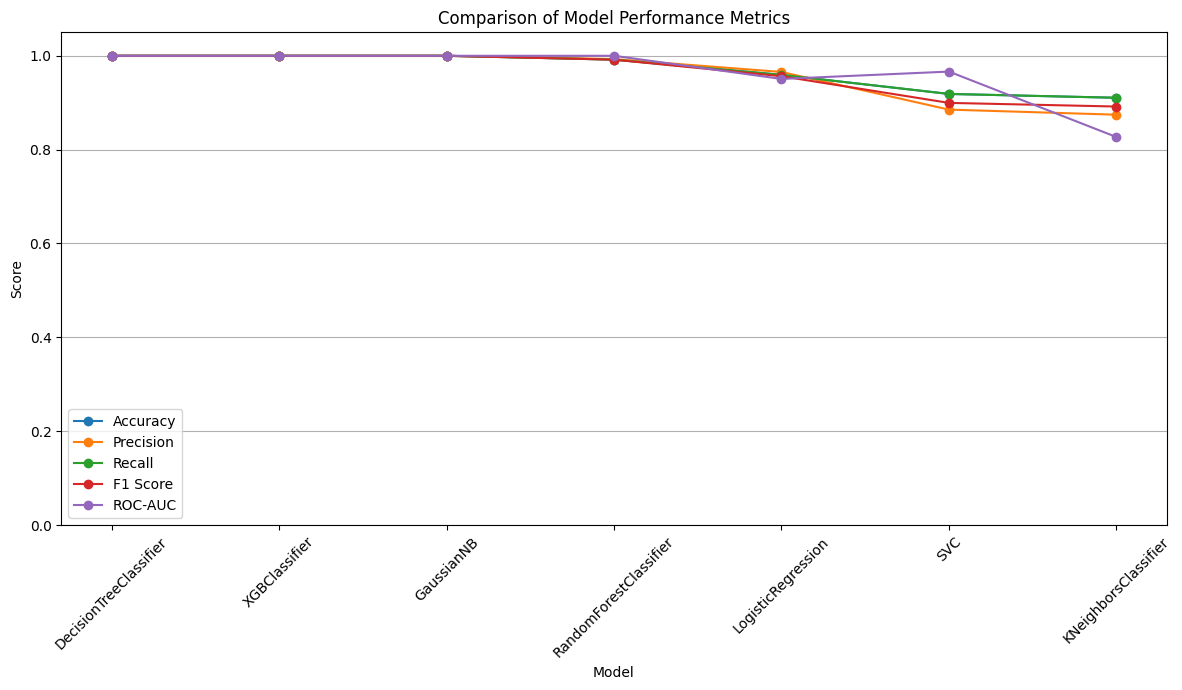

In [122]:
# Plot comparison graph
plot_comparison(results_df)